## Loading in packages

In [1]:
##### LOADING IN PACKAGES #--------------------------------------------------------------
import s3fs; import xarray as xr; import numpy as np
import pandas as pd; 
import dask.array as da
import ocetrac

import matplotlib.pyplot as plt; import cartopy.crs as ccrs

import warnings; import expectexception
warnings.filterwarnings('ignore')

import netCDF4 as nc; import datetime as dt
import scipy

import intake; import pprint
# Allow multiple lines per cell to be displayed without print (default is just last line)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Enable more explicit control of DataFrame display (e.g., to omit annoying line numbers)
from IPython.display import HTML

## Loading CESM LE dataset

In [2]:
# Open original collection description file #----------------------------------------------
cat_url_orig = '/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cesm2-le.json'
coll_orig = intake.open_esm_datastore(cat_url_orig)

In [3]:
subset = coll_orig.search(component='atm',variable='SST',frequency='month_1',experiment='historical')
subset.df.member_id.unique()
print(len(subset.df.member_id.unique()))

array(['r1i1001p1f1', 'r2i1021p1f1', 'r3i1041p1f1', 'r4i1061p1f1',
       'r5i1081p1f1', 'r6i1101p1f1', 'r7i1121p1f1', 'r8i1141p1f1',
       'r9i1161p1f1', 'r10i1181p1f1', 'r1i1231p1f1', 'r2i1231p1f1',
       'r3i1231p1f1', 'r4i1231p1f1', 'r5i1231p1f1', 'r6i1231p1f1',
       'r7i1231p1f1', 'r8i1231p1f1', 'r9i1231p1f1', 'r10i1231p1f1',
       'r1i1251p1f1', 'r2i1251p1f1', 'r3i1251p1f1', 'r4i1251p1f1',
       'r5i1251p1f1', 'r6i1251p1f1', 'r7i1251p1f1', 'r8i1251p1f1',
       'r9i1251p1f1', 'r10i1251p1f1', 'r1i1281p1f1', 'r2i1281p1f1',
       'r3i1281p1f1', 'r4i1281p1f1', 'r5i1281p1f1', 'r6i1281p1f1',
       'r7i1281p1f1', 'r8i1281p1f1', 'r9i1281p1f1', 'r10i1281p1f1',
       'r1i1301p1f1', 'r2i1301p1f1', 'r3i1301p1f1', 'r4i1301p1f1',
       'r5i1301p1f1', 'r6i1301p1f1', 'r7i1301p1f1', 'r8i1301p1f1',
       'r9i1301p1f1', 'r10i1301p1f1', 'r1i1011p1f2', 'r2i1031p1f2',
       'r3i1051p1f2', 'r4i1071p1f2', 'r5i1091p1f2', 'r6i1111p1f2',
       'r7i1131p1f2', 'r8i1151p1f2', 'r9i1171p1f2', 'r10i

100


In [4]:
subset = coll_orig.search(component='atm',variable='SST',frequency='month_1',experiment='historical',member_id= 'r1i1001p1f1')
subset.df
## control

,component,stream,case,member_id,variable,start_time,end_time,time_range,long_name,units,vertical_levels,frequency,path,experiment,forcing_variant,cesm_member_id,control_branch_year,cmip_experiment_id
0,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1850-01,1859-12,185001-185912,sea surface temperature,K,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/a...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
1,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1860-01,1869-12,186001-186912,sea surface temperature,K,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/a...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
2,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1870-01,1879-12,187001-187912,sea surface temperature,K,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/a...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
3,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1880-01,1889-12,188001-188912,sea surface temperature,K,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/a...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
4,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1890-01,1899-12,189001-189912,sea surface temperature,K,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/a...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
5,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1900-01,1909-12,190001-190912,sea surface temperature,K,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/a...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
6,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1910-01,1919-12,191001-191912,sea surface temperature,K,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/a...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
7,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1920-01,1929-12,192001-192912,sea surface temperature,K,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/a...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
8,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1930-01,1939-12,193001-193912,sea surface temperature,K,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/a...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
9,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1940-01,1949-12,194001-194912,sea surface temperature,K,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/a...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1


In [5]:
# Load catalog entries for subset into a dictionary of xarray datasets
dsets = subset.to_dataset_dict(zarr_kwargs={"consolidated": True}, storage_options={"anon": True})
print(f"\nDataset dictionary keys:\n {dsets.keys()}")


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream.forcing_variant.variable'



Dataset dictionary keys:
 dict_keys(['atm.historical.cam.h0.cmip6.SST'])


In [6]:
print(dsets)

{'atm.historical.cam.h0.cmip6.SST': <xarray.Dataset>
Dimensions:       (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32, ilev: 33, time: 1980, member_id: 1)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * zlon          (zlon) float64 0.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
  * member_id     (member_id) <U11 'r1i1001p1f1'
Dimensions without coordinates: nbnd
Data variables: (12/27)
    zlon_bnds     (zlon, nbnd) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    gw            (lat) float64 dask.array<chunksize=(192,), meta=np.ndarray>
    hyam          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    hybm          (lev) float64 dask.array<chunksize=(

In [7]:
ds = dsets['atm.historical.cam.h0.cmip6.SST']
SST = ds.SST.isel(member_id=0)
print(SST)

<xarray.DataArray 'SST' (time: 1980, lat: 192, lon: 288)>
dask.array<getitem, shape=(1980, 192, 288), dtype=float32, chunksize=(120, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
    member_id  <U11 'r1i1001p1f1'
Attributes:
    units:         K
    long_name:     sea surface temperature
    cell_methods:  time: mean


In [8]:
SST.load()

<xarray.DataArray 'SST' (time: 1980, lat: 192, lon: 288)>
array([[[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        ...,
        [271.33502, 271.335  , 271.33496, ..., 271.33514, 271.3351 ,
         271.33508],
        [271.3414 , 271.3414 , 271.34137, ..., 271.34146, 271.34143,
         271.3414 ],
        [271.34573, 271.34573, 271.34573, ..., 271.34576, 271.34573,
         271.34573]],

       [[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
...
        [271.39133, 271.39127, 271.39124, ..., 271.39154, 271.39145,
         271.39142],
        [271.3968 , 271.39676, 271.39673, ..., 271.39688, 271.39685,
         271.39682],
        [271.40018, 271.40015, 271.40015, ..., 271.40018, 271.40018,
         271.40018]],

       [[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        ...,
        [271.3778 , 271.37772, 271.37762, ..., 271.37802, 271.37796,
         271.3779 ],
        [271.38275, 271.38272, 271.38266, ..., 271.38287, 271.38284,
         271.38278],
        [271.38614, 271.38614, 271.38614, ..., 271.38617, 271.38617,
         271.38617]]], dtype=float32)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
    member_id  <U11 'r1i1001p1f1'
Attributes:
    units:         K
    long_name:     sea surface temperature
    cell_methods:  time: mean

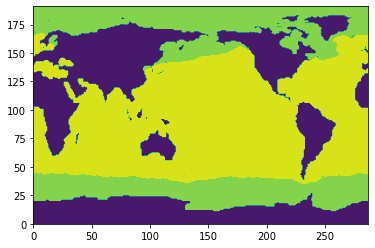

In [10]:
plt.contourf(SST[0,:,:])

In [13]:
SST_land = SST[0,:,:]
print(type(SST_land))
np.save('SST_land', SST_land)

<class 'xarray.core.dataarray.DataArray'>


## Linearly detrend SST 
#### Last 40 years (satellite period)

In [9]:
### Decompose SST maps into mean, trend, annual, and semi-annual harmonics
## Use least-squares regression and solve for model coefficients
dyr = SST.time.dt.year + (SST.time.dt.month-0.5)/12
dyr = dyr[-481:] # can remove this line if you want to detrend across the entire period

In [10]:
# Our 6 coefficient model is composed of the mean, trend, annual sine and cosine harmonics, & semi-annual sine and cosine harmonics
model = np.array([np.ones(len(dyr))] + [dyr-np.mean(dyr)] + [np.sin(2*np.pi*dyr)] + [np.cos(2*np.pi*dyr)] + [np.sin(4*np.pi*dyr)] + [np.cos(4*np.pi*dyr)])

# Take the pseudo-inverse of model to 'solve' least-squares problem
pmodel = np.linalg.pinv(model)

In [11]:
# Convert model and pmodel to xaray DataArray
model_da = xr.DataArray(model.T, dims=['time','coeff'], coords={'time':SST.time.values[-481:], 'coeff':np.arange(1,7,1)}) 
pmodel_da = xr.DataArray(pmodel.T, dims=['coeff','time'], coords={'coeff':np.arange(1,7,1), 'time':SST.time.values[-481:]})

In [12]:
# resulting coefficients of the model
sst_mod = xr.DataArray(pmodel_da.dot(SST), dims=['coeff','lat','lon'], coords={'coeff':np.arange(1,7,1), 'lat':SST.lat.values, 'lon':SST.lon.values})

In [13]:
# Construct mean, trend, and seasonal cycle
mean = model_da[:,0].dot(sst_mod[0,:,:])
trend = model_da[:,1].dot(sst_mod[1,:,:])
seas = model_da[:,2:].dot(sst_mod[2:,:,:])

# compute anomalies by removing all  the model coefficients 
ssta_notrend = SST-model_da.dot(sst_mod) #this is anomalies

In [14]:
print(pmodel_da.dot(SST).shape)
ssta_notrend.shape
print(model_da.dot(sst_mod).shape)

(6, 192, 288)


(481, 192, 288)

(481, 192, 288)


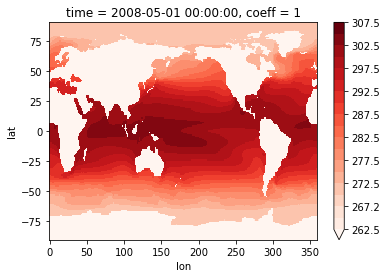

In [15]:
mean[400,:,:].plot(levels=[262.5,265,267.2,270,272.5,275,277.5,280,282.5,285,287.5,290,292.5,295,297.5,300,302.5,305,307.5],cmap='Reds')

In [16]:
detrended = ssta_notrend

In [17]:
# detrended.to_netcdf('detrended_ens0_last40years.nc')

## Thresholding and Features

In [18]:
###### THRESHOLD and FEATURES
if detrended.chunks:
    detrended = detrended.chunk({'time': -1})

In [19]:
threshold = detrended.groupby('time.month').quantile(0.9,dim=('time')) 
features_ssta = detrended.where(detrended.groupby('time.month')>=threshold, other=np.nan)

In [20]:
%%time
features_ssta= features_ssta[:,:,:].load()

CPU times: user 727 µs, sys: 0 ns, total: 727 µs
Wall time: 736 µs


In [21]:
##### MASKING
full_mask_land = features_ssta
full_masked = full_mask_land.where(full_mask_land != 0)

In [22]:
binary_out_afterlandmask=np.isfinite(full_masked)

In [23]:
newmask_1 = ds.SST.isel(member_id=0)[-481:]
newmask = newmask_1.where(newmask_1 != 0)

In [24]:
full_mask_land = features_ssta
full_masked = full_mask_land.where(full_mask_land != 0)
print(full_masked.shape)

(481, 192, 288)


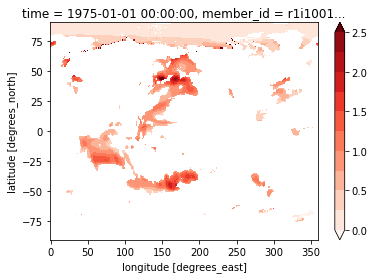

In [25]:
full_masked[0,:,:].plot(levels=[0.0,0.25,0.50,0.75,1.0,1.25,1.50,1.75,2.0,2.25,2.5],cmap='Reds') # trying this

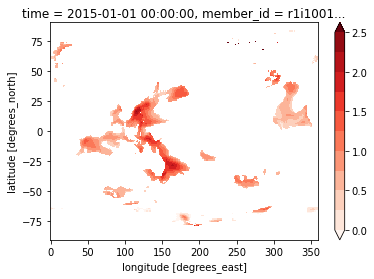

In [26]:
full_masked[480,:,:].plot(levels=[0.0,0.25,0.50,0.75,1.0,1.25,1.50,1.75,2.0,2.25,2.5],cmap='Reds') # trying this

(481, 192, 288)


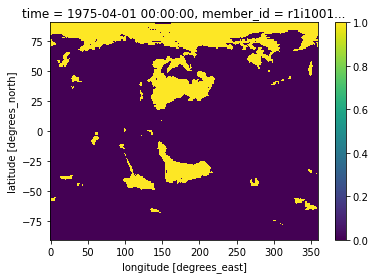

In [27]:
binary_out_afterlandmask=np.isfinite(full_masked)
print(binary_out_afterlandmask.shape)

binary_out_afterlandmask[3,:,:].plot()

In [28]:
print(binary_out_afterlandmask.shape)
newmask = np.isfinite(ds.SST[0,:,:,:][-481:]) #------------------------------------------------------------------------- Not really what I'm looking for...
print(newmask.shape)

(481, 192, 288)
(481, 192, 288)


In [40]:
%%time
Tracker = ocetrac.Tracker(binary_out_afterlandmask[:,:,:], newmask, radius=3, min_size_quartile=0.75, timedim = 'time', xdim = 'lon', ydim='lat', positive=True)
blobs = Tracker.track()

minimum area: 314.0
inital objects identified 	 5750
final objects tracked 	 370
CPU times: user 26.5 s, sys: 6.5 s, total: 33 s
Wall time: 1min 7s


In [41]:
blobs.attrs

{'inital objects identified': 5750,
 'final objects tracked': 370,
 'radius': 3,
 'size quantile threshold': 0.75,
 'min area': 314.0,
 'percent area reject': 0.2797669497236017,
 'percent area accept': 0.7202330502763983}

In [42]:
# blobs.to_netcdf("blobs_ens_0_rad4_rel_itself.nc")

<Figure size 1152x216 with 0 Axes>

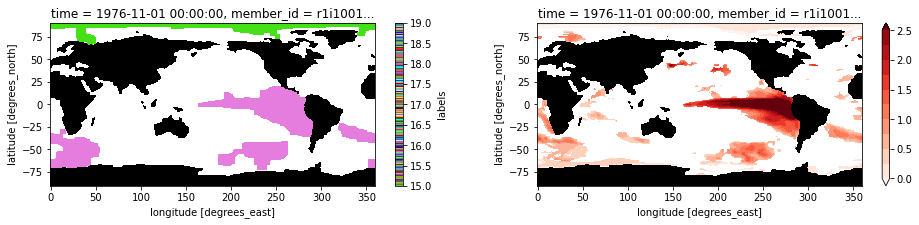

In [58]:
from matplotlib.colors import ListedColormap
maxl = int(np.nanmax(blobs.values))
cm = ListedColormap(np.random.random(size=(maxl, 3)).tolist())

timed = 22
plt.figure(figsize=(16,3))
ax1 = plt.subplot(121)
blobs.isel(time=timed).plot(cmap= cm)
features_ssta.isel(time=timed).where(features_ssta.isel(time=timed)==0.0).plot.contourf(colors='k', add_colorbar=False)

ax2 = plt.subplot(122); 
full_masked[timed,:,:].plot(levels=[0.0,0.25,0.50,0.75,1.0,1.25,1.50,1.75,2.0,2.25,2.5],cmap='Reds')
features_ssta.isel(time=timed).where(features_ssta.isel(time=timed)==0.0).plot.contourf(colors='k', add_colorbar=False)

In [47]:
mo = Tracker._morphological_operations()

In [49]:
newname = 'sdnjk'

In [52]:
# blobs.to_netcdf("blobs_detrended_last40years.nc")
blobs.to_netcdf('/glade/work/cassiacai/'+newname+'.nc')

#detrended.to_netcdf("detrended_sample.nc")

# Blob attributes

In [76]:
datetimeindex_blobs = blobs.indexes['time'].to_datetimeindex()
print(datetimeindex_blobs)

AttributeError: 'DatetimeIndex' object has no attribute 'to_datetimeindex'

In [56]:
blobs['time'] = datetimeindex_blobs

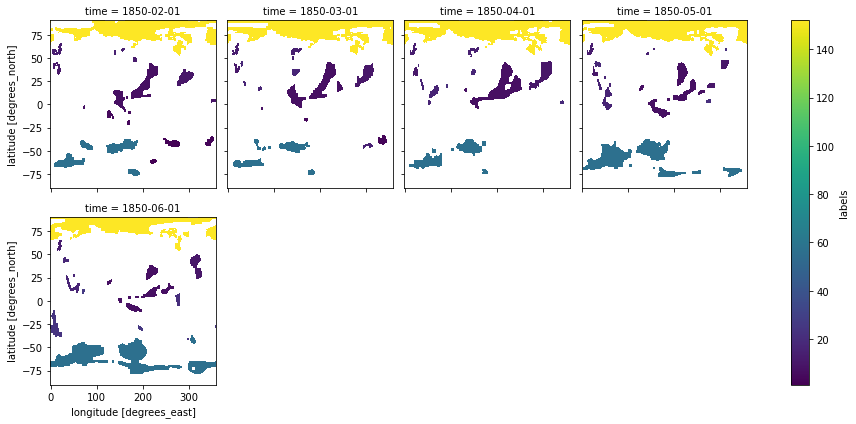

In [77]:
blobs.sel(time=slice('02-01-1850', '06-01-1850')).plot(col='time', col_wrap=4)

In [78]:
id = 1
event = blobs.where(blobs==id, drop=True)
event.shape
print(event)

(1, 6, 11)

<xarray.DataArray 'labels' (time: 1, lat: 6, lon: 11)>
array([[[nan, nan,  1.,  1.,  1.,  1.,  1., nan, nan, nan, nan],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1., nan, nan]]])
Coordinates:
  * lat        (lat) float64 -63.61 -62.67 -61.73 -60.79 -59.84 -58.9
  * lon        (lon) float64 217.5 218.8 220.0 221.2 ... 226.2 227.5 228.8 230.0
  * time       (time) datetime64[ns] 1850-02-01
    member_id  <U11 'r1i1001p1f1'
    quantile   float64 0.9
    month      (time) int64 2
Attributes:
    inital objects identified:  37264
    final objects tracked:      9105
    radius:                     2
    size quantile threshold:    0.0
    min area:                   1.0
    percent area reject:        3.91754142664971e-06
    

In [84]:
duration = [] # number of months
duration.append(list(event.shape)[0])
print(duration)

id_stored = []
id_stored.append(int(np.nanmedian(event.values)))
print(id_stored)

date = []
date.append(event.time.values.astype('datetime64[M]'))
print(date)

[2]
[3]
[array(['1850-02', '1850-03'], dtype='datetime64[M]')]


In [91]:
event_ssta = detrended.where(event>0,drop=True)
intensity_max = []; intensity_min = []; intensity_mean = []; intensity_cumulative = []; coordinates = []
intensity_mean.append(event_ssta.mean(('lat','lon')).values)
intensity_max.append(event_ssta.max(('lat','lon')).values)
intensity_min.append(event_ssta.min(('lat','lon')).values)
intensity_cumulative.append(np.nansum(event_ssta))

coords = event.stack(z=('lat','lon'))
coord_pairs = [(coords.isel(time=t[0]).dropna(dim='z', how='any').z.lat.values, 
                coords.isel(time=t[0]).dropna(dim='z', how='any').z.lon.values) for t in enumerate(event.time)]
coordinates.append(coord_pairs)   
print(intensity_max)
print(intensity_min)
print(intensity_mean)
print(intensity_cumulative)
print(coords)


# event_intensity = detrended.where((ds.time==event.time) & (ds.lat==event.lat) & (ds.lon==event.lon), drop=True).load();
# event_intensity = event_intensity.expand_dims(dim='intensity', axis=3)
# events_contour = event.fillna(0)

[array([1.39851163, 1.4381957 ])]
[array([0.80345107, 0.80785385])]
[array([1.13404981, 1.15048679])]
[277.7930961273208]
<xarray.DataArray 'labels' (time: 2, z: 288)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  3.,  3.,  3.,
         3.,  3.,  3.,  3.,  3.,  3., nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3.,  3.,  3.,  3., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3.,  3., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3., nan, nan, nan, n

In [85]:
def _get_intensity_area(event, ssta, mhw):
    '''Calculates event intensities and area at each time interval using anomaly data and coordinates 
    cooresponding to the event.'''
    
    event_ssta = ssta.where(event>0, drop=True)        
    mhw['intensity_mean'].append(event_ssta.mean(('lat','lon')).values)
    mhw['intensity_max'].append(event_ssta.max(('lat','lon')).values) 
    mhw['intensity_min'].append(event_ssta.min(('lat','lon')).values)
    mhw['intensity_cumulative'].append(np.nansum(event_ssta))
    coords = event.stack(z=('lat','lon'))
    coord_pairs = [(coords.isel(time=t[0]).dropna(dim='z', how='any').z.lat.values, 
                      coords.isel(time=t[0]).dropna(dim='z', how='any').z.lon.values) for t in enumerate(event.time)]

    mhw['coords'].append(coord_pairs)

    # Calculate weighted cell area assuming 0.25º resolution data and 111 km per degree of latitude
    y, x = zip(*coord_pairs)
    dlon = [np.cos(y[c]*np.pi/180)*(111*.25) for c in np.arange(0, len(coord_pairs))]
    dlat = (111*.25) * np.ones(len(dlon))
    cell_area = [np.sum(dlon[c]*dlat[c]) for c in np.arange(0, len(coord_pairs))]
    mhw['area'].append(cell_area)

    return mhw

In [86]:
intensity_area = _get_intensity_area(event, detrended, mhw)

NameError: name 'mhw' is not defined

In [60]:
print(event.time[0])

<xarray.DataArray 'time' ()>
array('1850-02-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time       datetime64[ns] 1850-02-01
    member_id  <U11 'r1i1001p1f1'
    quantile   float64 0.9
    month      int64 2


In [61]:
datetimeindex_event = event.indexes['time']
print(datetimeindex_event)
print(ds.time)

DatetimeIndex(['1850-02-01'], dtype='datetime64[ns]', name='time', freq=None)
<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 4, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2014, 11, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds


In [62]:
datetimeindex_ds_init = ds.indexes['time'].to_datetimeindex()
print(datetimeindex_ds_init)
ds['time'] = datetimeindex_ds_init

DatetimeIndex(['1850-02-01', '1850-03-01', '1850-04-01', '1850-05-01',
               '1850-06-01', '1850-07-01', '1850-08-01', '1850-09-01',
               '1850-10-01', '1850-11-01',
               ...
               '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01'],
              dtype='datetime64[ns]', length=1980, freq=None)


In [63]:
datetimeindex_detrended = detrended.indexes['time'].to_datetimeindex()
print(datetimeindex_detrended)
detrended['time'] = datetimeindex_detrended

DatetimeIndex(['1850-02-01', '1850-03-01', '1850-04-01', '1850-05-01',
               '1850-06-01', '1850-07-01', '1850-08-01', '1850-09-01',
               '1850-10-01', '1850-11-01',
               ...
               '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01'],
              dtype='datetime64[ns]', length=1980, freq=None)


In [64]:
print(event.sel(time=slice('02-01-1850', '05-01-1850')))

<xarray.DataArray 'labels' (time: 1, lat: 6, lon: 11)>
array([[[nan, nan,  1.,  1.,  1.,  1.,  1., nan, nan, nan, nan],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1., nan, nan]]])
Coordinates:
  * lat        (lat) float64 -63.61 -62.67 -61.73 -60.79 -59.84 -58.9
  * lon        (lon) float64 217.5 218.8 220.0 221.2 ... 226.2 227.5 228.8 230.0
  * time       (time) datetime64[ns] 1850-02-01
    member_id  <U11 'r1i1001p1f1'
    quantile   float64 0.9
    month      (time) int64 2
Attributes:
    inital objects identified:  37264
    final objects tracked:      9105
    radius:                     2
    size quantile threshold:    0.0
    min area:                   1.0
    percent area reject:        3.91754142664971e-06
    

In [65]:
event_intensity = detrended.where((ds.time==event.time), drop=True).load()
print(event_intensity.shape)

(1, 192, 288)


In [66]:
event_intensity = detrended.where((ds.time==event.time) & (ds.lat==event.lat) & (ds.lon==event.lon), drop=True).load();
event_intensity = event_intensity.expand_dims(dim='intensity', axis=3)
events_contour = event.fillna(0)

In [67]:
print(events_contour.shape)
print(event_intensity.shape)

(1, 6, 11)
(1, 6, 11, 1)


1.8083315473909352


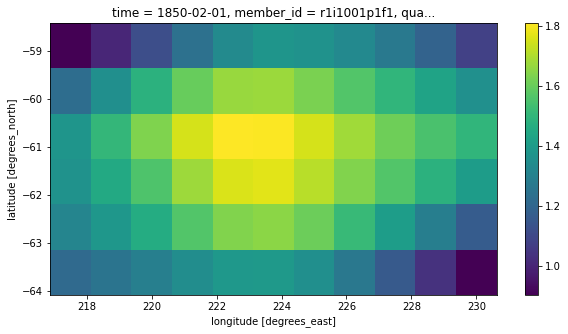

In [73]:
event_intensity.plot()
print(np.nanmax(event_intensity))

In [70]:
event = blobs
event = blobs.where(blobs==id, drop=True)

In [72]:
event.where(3)

<xarray.DataArray 'labels' (time: 1980, lat: 192, lon: 288)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [152.,  nan,  nan, ..., 152., 152., 152.],
        [152.,  nan,  nan, ..., 152., 152., 152.],
        [152.,  nan,  nan, ..., 152., 152., 152.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [152., 152., 152., ..., 152., 152., 152.],
        [152., 152., 152., ..., 152., 152., 152.],
        [152., 152., 152., ..., 152., 152., 152.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
...
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]])
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) datetime64[ns] 1850-02-01 1850-03-01 ... 2015-01-01
    member_id  <U11 'r1i1001p1f1'
    quantile   float64 0.9
    month      (time) int64 2 3 4 5 6 7 8 9 10 11 12 ... 4 5 6 7 8 9 10 11 12 1
Attributes:
    inital objects identified:  37264
    final objects tracked:      9105
    radius:                     2
    size quantile threshold:    0.0
    min area:                   1.0
    percent area reject:        3.91754142664971e-06
    percent area accept:        0.9999960824585733

In [98]:
detrended

<xarray.DataArray (time: 1980, lat: 192, lon: 288)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00204387, 0.00202101, 0.00198073, ..., 0.00214502,
         0.0021168 , 0.00208237],
        [0.00379115, 0.00376729, 0.00371629, ..., 0.00389063,
         0.00385792, 0.00381125],
        [0.00548383, 0.00548433, 0.00548465, ..., 0.00551038,
         0.00548165, 0.00548196]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.01422885, 0.01409479, 0.01397243, ..., 0.01463456,
         0.0144768 , 0.01437459],
        [0.01453887, 0.01446966, 0.01440458, ..., 0.01470859,
         0.01466107, 0.01460187],
        [0.01526279, 0.01523316, 0.01523337, ..., 0.01526084,
         0.01526212, 0.01526233]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00135659, 0.00123092, 0.00108443, ..., 0.00166409,
         0.00156793, 0.00146543],
        [0.00099742, 0.00093717, 0.0008516 , ..., 0.00116708,
         0.00113073, 0.00105066],
        [0.00152555, 0.00152735, 0.00152793, ..., 0.0015502 ,
         0.00155327, 0.00155428]]])
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) datetime64[ns] 1850-02-01 1850-03-01 ... 2015-01-01
    member_id  <U11 'r1i1001p1f1'

# ANALYSIS

In [68]:
blobs.attrs

{'inital objects identified': 37264,
 'final objects tracked': 9105,
 'radius': 2,
 'size quantile threshold': 0.0,
 'min area': 1.0,
 'percent area reject': 3.91754142664971e-06,
 'percent area accept': 0.9999960824585733}

In [114]:
id_list = []
length_list = []
lat_list = []
lon_list = []
year_start_list = []
for i in range(1,9105):
    id = i; id_list.append(i)
    event = blobs.where(blobs==id, drop=True)
    characteristics = list(event.shape)
    length = characteristics[0]; length_list.append(length)
    lat = characteristics[1]; lat_list.append(lat)
    lon = characteristics[0]; lon_list.append(lon)
    year_start = int(event.time.dt.year[0])
    year_start_list.append(year_start)

In [116]:
id_list1 = []
length_list1 = []
lat_list1 = []
lon_list1 = []
year_start_list1 = []
for i in range(941,1037):
    id = i; id_list.append(i)
    event = blobs.where(blobs==id, drop=True)
    characteristics = list(event.shape)
    length = characteristics[0]; length_list1.append(length)
    lat = characteristics[1]; lat_list1.append(lat)
    lon = characteristics[0]; lon_list1.append(lon)
    year_start = int(event.time.dt.year[0])
    year_start_list1.append(year_start)

In [120]:
print(np.nanmax(year_start_list))

1890


In [118]:
print(np.nanmax(year_start_list1))

1895


In [211]:
df = pd.DataFrame(list(zip(id_list, length_list, lat_list, lon_list, year_start_list)),
               columns =['id', 'length', 'lat', 'lon', 'year_start'])

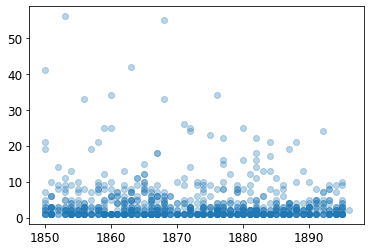

In [208]:
plt.scatter(year_start_list, length_list,alpha=0.3)

<AxesSubplot:>

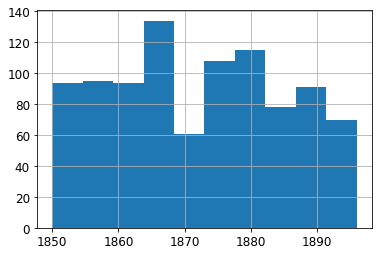

In [212]:
df['year_start'].hist()

In [205]:
print(year_start_list)
print(id_list)
print(lon_list)

[1850]
[1]
[21]


In [79]:
id = 3
event = blobs.where(blobs==id, drop=True)
shaped = list(event.shape)
print(shaped[0])
print(list(shaped))
time = event[0]['time']
print('****')
print(time.time)
print('****')
print(event[0]['time']['time'])

2
[2, 12, 24]
****
<xarray.DataArray 'time' ()>
array('1850-02-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time       datetime64[ns] 1850-02-01
    member_id  <U11 'r1i1001p1f1'
    quantile   float64 0.9
    month      int64 2
****
<xarray.DataArray 'time' ()>
array('1850-02-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time       datetime64[ns] 1850-02-01
    member_id  <U11 'r1i1001p1f1'
    quantile   float64 0.9
    month      int64 2


In [181]:
time = event.time[0]['month']
print(int(time))

2


In [183]:
time = event.time[0]
print((time))

<xarray.DataArray 'time' ()>
array('1850-02-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time       datetime64[ns] 1850-02-01
    member_id  <U11 'r1i1001p1f1'
    quantile   float64 0.9
    month      int64 2


In [197]:
import datetime
lists = []
lists.append(str(event[0,:,:]['time']))
lists.append(str(event[1,:,:]['time']))
print(lists)

["<xarray.DataArray 'time' ()>\narray('1850-02-01T00:00:00.000000000', dtype='datetime64[ns]')\nCoordinates:\n    time       datetime64[ns] 1850-02-01\n    member_id  <U11 'r1i1001p1f1'\n    quantile   float64 0.9\n    month      int64 2", "<xarray.DataArray 'time' ()>\narray('1850-03-01T00:00:00.000000000', dtype='datetime64[ns]')\nCoordinates:\n    time       datetime64[ns] 1850-03-01\n    member_id  <U11 'r1i1001p1f1'\n    quantile   float64 0.9\n    month      int64 3"]


In [202]:
int(event.time.dt.year[0])

1850